# Dataset Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")  # optional, for nicer plots
from features import build_base_timeseries

csv_path = "../data/dataset_wilso_v1.csv"
df = build_base_timeseries(csv_path)

In [2]:
# Compute market returns (simple % change)
df["market_ret"] = df["composite_close"].pct_change()

# Drop first row with NaN return
df = df.dropna(subset=["market_ret"]).reset_index(drop=True)

### Plot 1: Market price over time

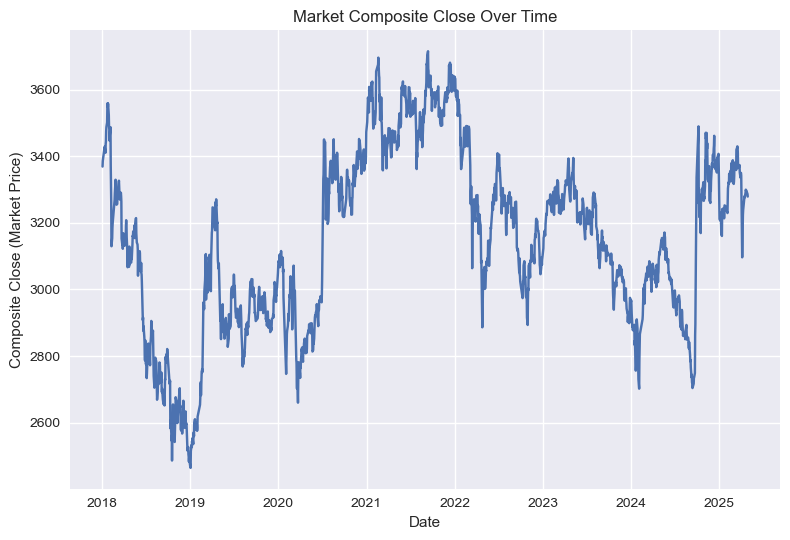

In [3]:
plt.figure()
plt.plot(df["date"], df["composite_close"])
plt.xlabel("Date")
plt.ylabel("Composite Close (Market Price)")
plt.title("Market Composite Close Over Time")
plt.tight_layout()
plt.show()

### Plot 2: Market returns over time

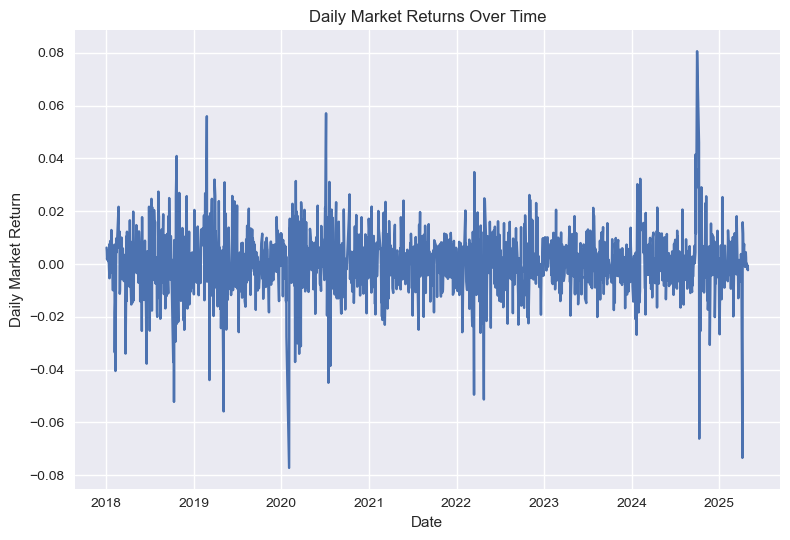

In [4]:
plt.figure()
plt.plot(df["date"], df["market_ret"])
plt.xlabel("Date")
plt.ylabel("Daily Market Return")
plt.title("Daily Market Returns Over Time")
plt.tight_layout()
plt.show()

### Plot 3: Aggregated sentiment (photo vs text)

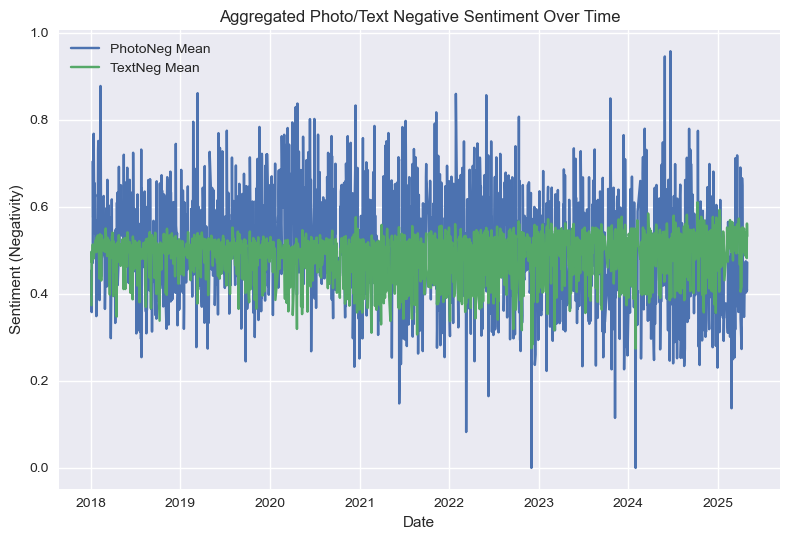

In [5]:
plt.figure()
plt.plot(df["date"], df["photo_neg_mean"], label="PhotoNeg Mean")
plt.plot(df["date"], df["text_neg_mean"], label="TextNeg Mean")
plt.xlabel("Date")
plt.ylabel("Sentiment (Negativity)")
plt.title("Aggregated Photo/Text Negative Sentiment Over Time")
plt.legend()
plt.tight_layout()
plt.show()

## Data Check
### Time span & basic sanity

- Dates: 2018-01-02 to 2025-04-30
- Rows: 1,777 trading days
- Large gaps (>10 days between rows): 3 gaps — likely around holidays / long breaks, not crazy.

Structurally the series looks healthy.

### Market price and returns

Composite close plot:
- Reasonable equity-index behavior: big drawdowns ~2018–2019, ~2022, ~late 2024.
- No insane spikes or obvious data glitches.

Daily returns plot:
- Most returns in roughly the -4 band, with a few outliers up to around +8% / −7% — plausible crisis/volatile days.
- No absurd 50% daily jump or NaN bands, so returns look sane.

### Aggregated sentiment (PhotoNeg vs TextNeg)
- PhotoNeg mean range: ~0.00 to ~0.96
- TextNeg mean range: ~0.27 to ~0.61

Visual impressions:

- PhotoNeg_mean: Much more volatile, with frequent dips and spikes. Several clear spikes above 0.8–0.9 that likely correspond to very pessimistic visual news periods (big crises/events).
- TextNeg_mean: Tighter band, roughly 0.4–0.55 most of the time. Still shows slow drifts and occasional bumps, but far smoother than the photo index.

Nothing looks broken: both sentiment series stay between 0 and 1, no flat-line periods, and they appear to move over time in a way that could plausibly track news cycles.